In [3]:
using BeamLib: IsotropicArray, steerphi, lasso
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])
Δ = 1

# test signal generation
Θ = deg2rad.([10, 65])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
x = s + n

θgrid = Vector(-90:90)
A = reduce(hcat,steerphi.(Ref(pa), Ref(fc), deg2rad.(θgrid)))
spectrum = lasso(x[:,1:150], A, 27)
threshold = 1
Θest = θgrid[spectrum .> threshold]
println(Θest)
println(spectrum[spectrum .> threshold])

------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 54482, constraints m: 55683
cones: 	  q: soc vars: 55683, qsize: 182
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 487683, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|5.40e+002 2.70e+001 2.64e+006 -1.32e+006 1.00e-001 1.84e-001 
   250|4.56e-001 2.25e-002 1.43e+001 2.12e+002 3.80e+000 1.28e+000 


┌ Info: [Convex.jl] Compilation finished: 2.31 seconds, 947.555 MiB of memory allocated
└ @ Convex C:\Users\matt\.julia\packages\Convex\IPPoR\src\solution.jl:107


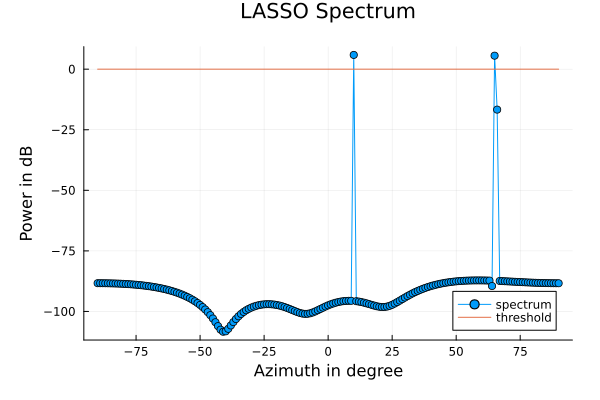

In [4]:
using Plots
import Measures
p1 = plot(θgrid, 10*log10.(abs.(spectrum)),marker=:dot, label="spectrum")
plot!(title="LASSO Spectrum", margin=5*Measures.mm)
plot!(θgrid,  10*log10.(threshold)*ones(length(θgrid),1), label="threshold")
xlabel!("Azimuth in degree")
ylabel!("Power in dB")